Question 1:

In [45]:
# to utilize sqrt function
import numpy as np
# to utilize dataframe function 
import pandas as pd
# to utilize the ttest_1samp
import scipy.stats as stats

# calculate sample mean before calculating t-score
daily_energy = {
    "energy_in_kj": [5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770] 
}
de_df = pd.DataFrame(data=daily_energy)

# H0 there's no deviation
# H1 energy intake deviates systematically 

# recommended value
hypothesized_mean = 7725

alpha_level = 0.05

de_sample_mean =  de_df.mean()
# in this case the sample mean and population mean are the same
de_population_mean = de_sample_mean
de_std = de_df.std(ddof=1)
de_dof = (len(daily_energy["energy_in_kj"]))-1
de_sem = de_std / np.sqrt(len(daily_energy["energy_in_kj"]))

de_t_stat, de_p_value = stats.ttest_1samp(daily_energy["energy_in_kj"], hypothesized_mean)

# print("Daily Energy intakes:", daily_energy["energy_in_kj"])
# print("Population Mean:", de_population_mean.values[0])
print("Sample Mean:", de_sample_mean.values[0])
print("Sample Standard Deviation:", de_std.values[0])
print("Standard error of mean:", de_sem.values[0])
print("T-statistic:", de_t_stat)
print("Degree of freedom:", de_dof)
print("P-value:", de_p_value)
if de_p_value != alpha_level: print(f"Conclusion: Null hypothesis (H0) rejected: The women’s energy \n intake deviates systematically (either greater or less than the recommended value).")
else: print(f"Conclusion: Null hypothesis (H0) not rejected: The women’s energy intake does\n not deviate systematically from a recommended value.")

Sample Mean: 6753.636363636364
Sample Standard Deviation: 1142.1232221373727
Standard error of mean: 344.3631083801271
T-statistic: -2.8207540608310193
Degree of freedom: 10
P-value: 0.018137235176105812
Conclusion: Null hypothesis (H0) rejected: The women’s energy 
 intake deviates systematically (either greater or less than the recommended value).


Question 2:

In [76]:
# to utilize sqrt function
import numpy as np
# to utilize dataframe function 
import pandas as pd
import scipy.stats as stats

goes_data = {
    "Location": ["Ireland","Elsewhere"],
    "Sample Size": [42,61],
    "Mean": [74,57],
    "Standard Deviation": [7.4,7.1]
}

goes_df = pd.DataFrame(data=goes_data)
# H0 goes score is the same elsewhere  
# H1 goes score is not equal to other countries
# valid test would be a one tailed test 
# since no values for the individual goes scores are provided, a pooled standard deviation formula is appropriate 
# using the two sample test since we are comparing means from two groups

alpha_level = 0.05

# in order to calculate the t-test, get the Standard error of mean for both groups
i_std_d = goes_data["Standard Deviation"][0]
i_ss = goes_data["Sample Size"][0]
i_mean = goes_data["Mean"][0]
e_std_d = goes_data["Standard Deviation"][1]
e_ss = goes_data["Sample Size"][1]
e_mean = goes_data["Mean"][1]

i_squared= i_std_d ** 2
e_squared= e_std_d ** 2

# pooled standard deviation formula
goes_sp = np.sqrt(((i_ss - 1 ) * i_squared + (e_ss - 1) * e_squared)/(i_ss + e_ss - 2))

# t-statistic
goes_t_statistic =(i_mean-e_mean)/(goes_sp*np.sqrt((1/i_ss) + (1/e_ss))) 

print("T-statistic:", goes_t_statistic)

# degrees of freedom
dof = (i_ss + e_ss) - 2
print("Degree of Freedom:", dof)

# one-tailed p-value
goes_p_value = stats.t.sf(goes_t_statistic, dof)
print(f"P-value (without rounding): {goes_p_value}")
print(f"P-value (rounded): {goes_p_value:.4f}")

if goes_p_value < alpha_level: print(f"Conclusion: Null hypothesis rejected - The GOES score in Ireland is \nsignificantly higher than that in the Elsewhere group.")
else: print(f"Conclusion: Null hypothesis not rejected - There’s no significant difference\n between the GOES scores of Ireland and Elsewhere.")

T-statistic: 11.73775770205081
Degree of Freedom: 101
P-value (without rounding): 6.979768077580737e-21
P-value (rounded): 0.0000
Conclusion: Null hypothesis rejected - The GOES score in Ireland is 
significantly higher than that in the Elsewhere group.


Question 3:

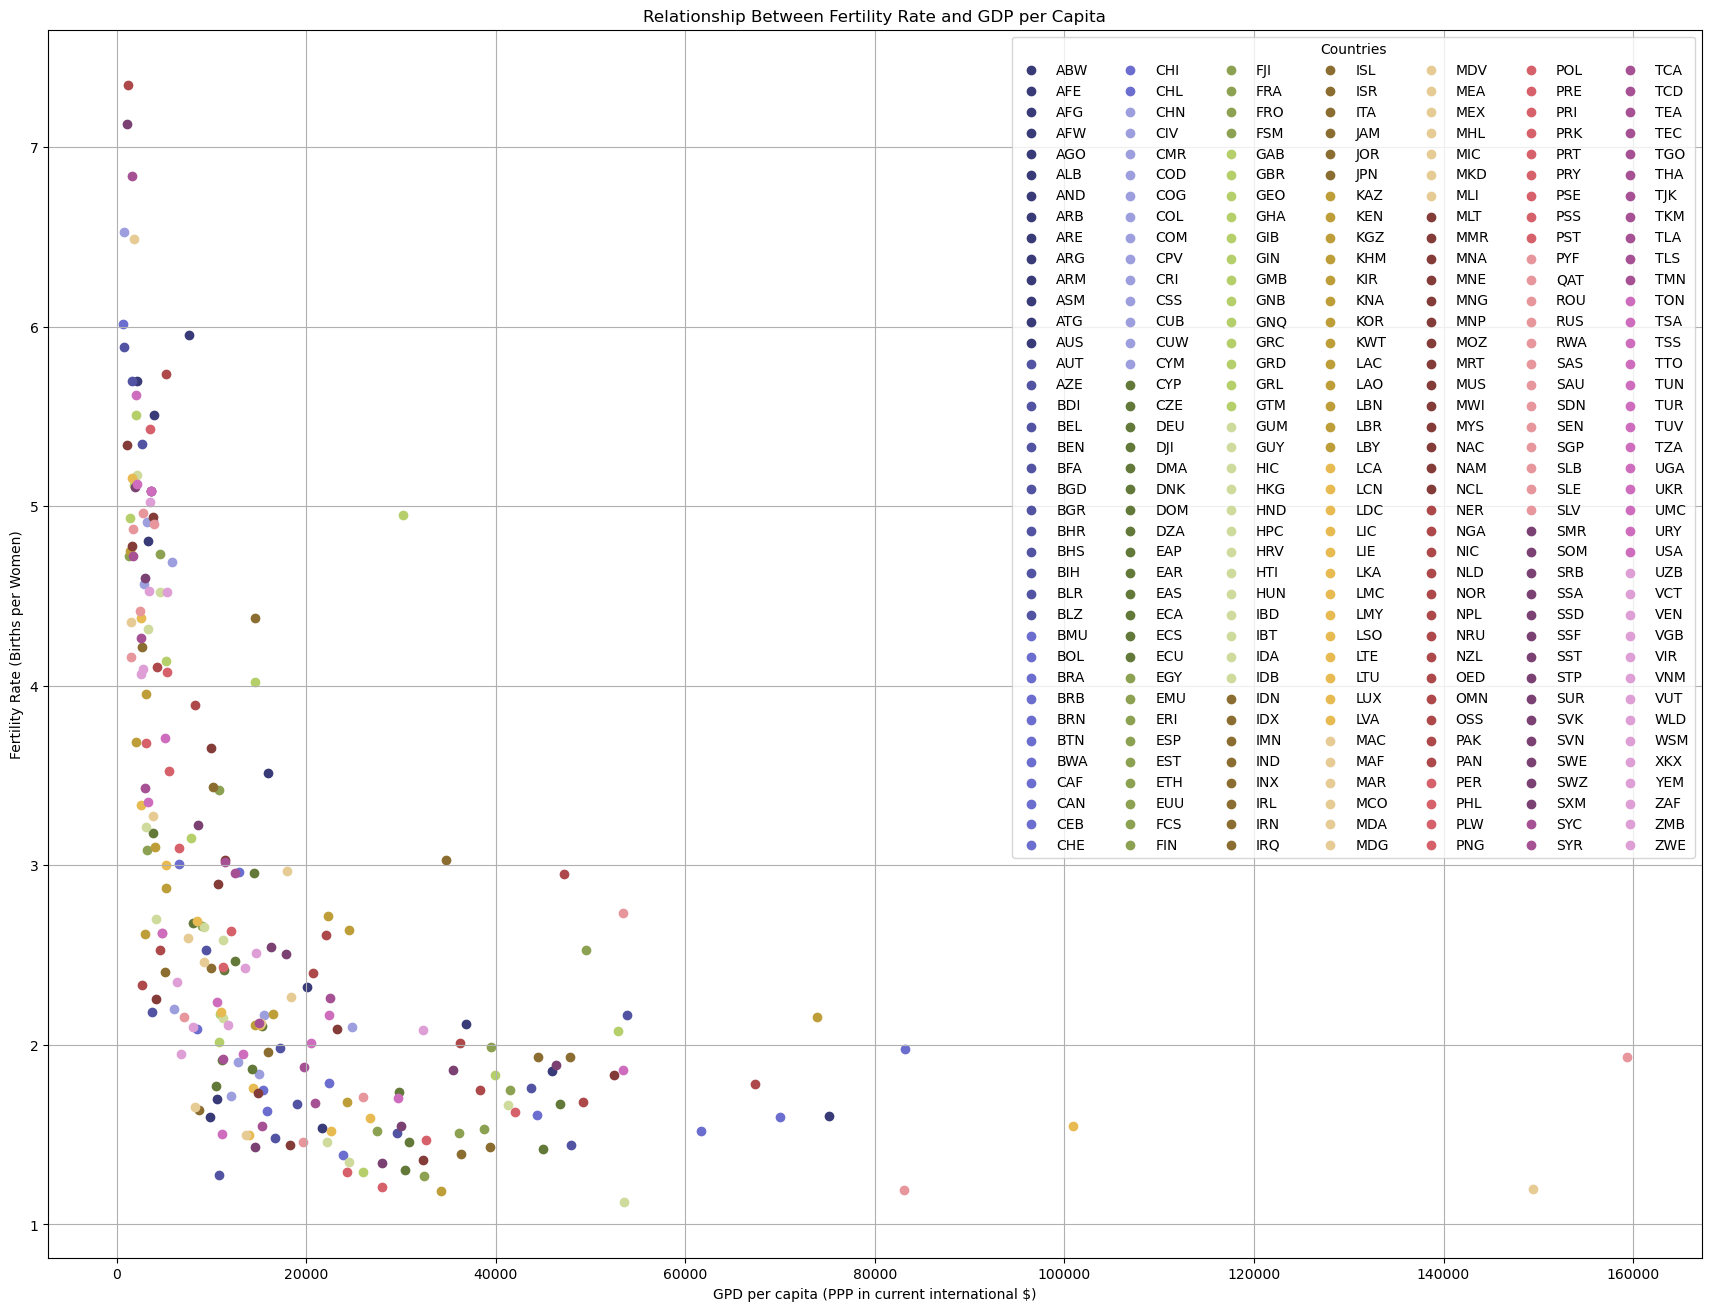

Correlation Coefficient: -0.5171011715833221


In [110]:
# to utilize the read_excel function
import pandas as pd
# to utilize the tabulate formatter for tables
from tabulate import tabulate as tb
# to utilize the plt function
import matplotlib.pyplot as plt

fertility_rate_df = pd.read_excel('data/fertility_rate.xls', sheet_name="Data", skiprows=3)
gdp_per_capita = pd.read_excel('data/gdp_per_capita.xls', sheet_name="Data", skiprows=3)

fertility_rate_df_filtered = fertility_rate_df.drop(columns=['Indicator Name', 'Country Name', 'Indicator Code'])
gdp_per_capita_df_filtered = gdp_per_capita.drop(columns=['Indicator Name', 'Country Name', 'Indicator Code'])

fertility_rate_df_melted = fertility_rate_df_filtered.melt(id_vars='Country Code', var_name='Year', value_name='Fertility')
gdp_per_capita_melted = gdp_per_capita_df_filtered.melt(id_vars='Country Code', var_name='Year', value_name='GDP')
# print(gdp_per_capita_melted)

fertility_gdp_df = pd.merge(fertility_rate_df_melted, gdp_per_capita_melted, on=['Year', 'Country Code'])

fertility_gdp_converted = fertility_gdp_df
fertility_gdp_converted['Year'] = pd.to_datetime(fertility_gdp_df['Year'], format='%Y')
fertility_gdp_df_2013 = fertility_gdp_converted[fertility_gdp_converted['Year'].dt.year == 2013]
fertility_gdp_df_2013.reset_index(inplace=True)

colors = plt.get_cmap('tab20b', len(fertility_gdp_df_2013['Country Code']))

plt.figure(figsize=(17,13), constrained_layout=True)
for i, country in enumerate(fertility_gdp_df_2013['Country Code']):
    plt.scatter(fertility_gdp_df_2013['Fertility'][i], fertility_gdp_df_2013['GDP'][i], color=colors(i), label=country)
plt.title("Relationship Between Fertility Rate and GDP per Capita")
plt.xlabel('GPD per capita (PPP in current international $)')
plt.ylabel('Fertility Rate (Births per Women)')
# plt.xscale('log')

# for i in range(len(fertility_gdp_df_2013)):
#     plt.annotate(fertility_gdp_df_2013['Country Code'][i], (fertility_gdp_df_2013['Fertility'][i], fertility_gdp_df_2013['GDP'][i]), textcoords="offset points", xytext=(0,5), ha="center", fontsize=7)
    
plt.grid(True)
plt.legend(title='Countries', ncol=7)
plt.show()

corr_coefficient = fertility_gdp_df_2013['GDP'].corr(fertility_gdp_df_2013['Fertility'])
print(f'Correlation Coefficient: {corr_coefficient}')




Question 4:

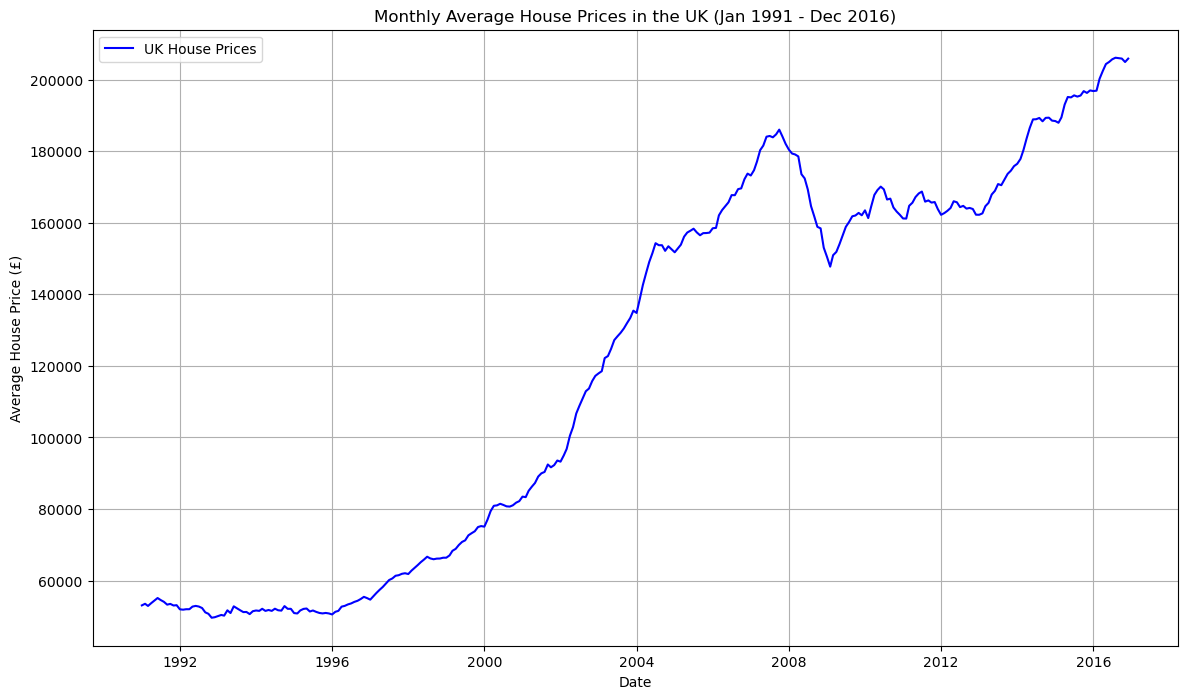

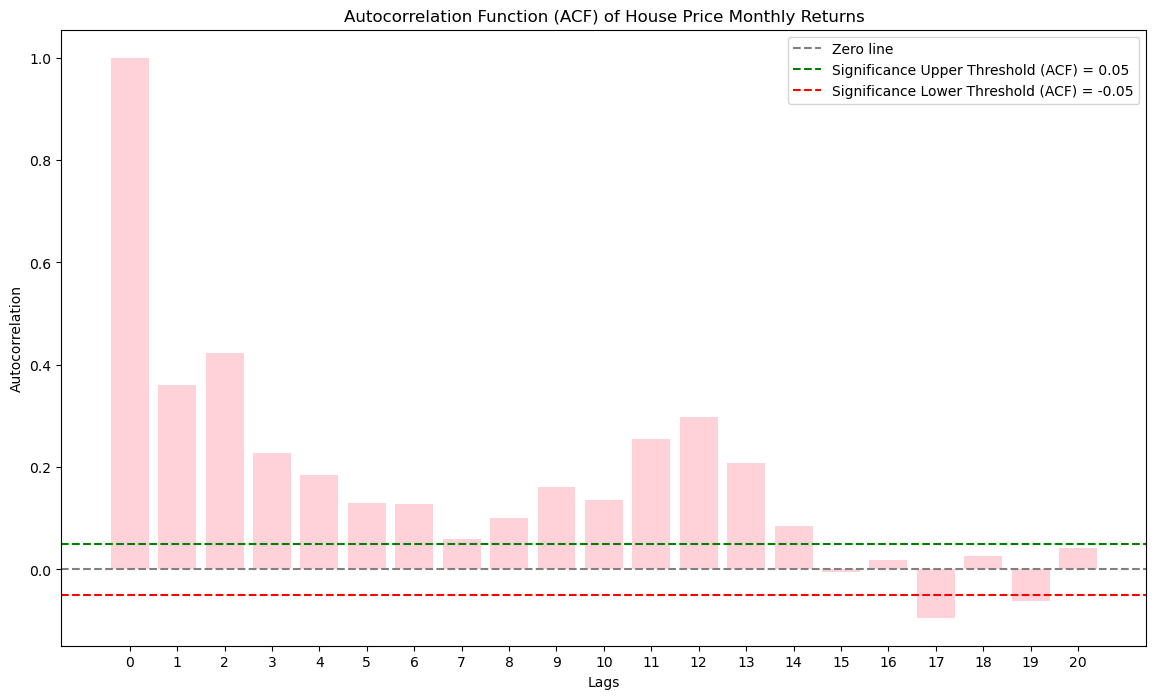

Annualized Return (as a percentage): 5.453020256940899% 


In [84]:
# to utilize the read_excel function
import pandas as pd
# to utilize the arange function
import numpy as np
# to configure and plot graphs
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

# save data from file into dataframe
house_price_df = pd.read_excel('data/Monthly Average House Price.xls', sheet_name='Monthly')
house_price_df.set_index('Unnamed: 0', inplace=True)

# filter the dataframe to data up to 2016
house_price_df = house_price_df[ house_price_df.index <= '2016-12-31']

# configure and plot graph
plt.figure(figsize=(14,8))
plt.plot(house_price_df.index, house_price_df['Average House Price'],color='blue', label="UK House Prices")
plt.title("Monthly Average House Prices in the UK (Jan 1991 - Dec 2016)")
plt.xlabel("Date")
plt.ylabel("Average House Price (£)")
plt.legend()
plt.grid()

# calculate average monthly return
house_price_df['Monthly Return'] = house_price_df['Average House Price'].pct_change()
clean_returns = house_price_df['Monthly Return'].dropna().values

# calculate the ACF
house_acf = acf(house_price_df['Monthly Return'].dropna(), nlags=20)

# configure and plot graph
plt.figure(figsize=(14,8))
plt.bar(range(len(house_acf)), house_acf, color='pink', alpha=0.7)
plt.axhline(y=0, color='gray', linestyle='--', label="Zero line")
plt.axhline(y=0.05, color='green', linestyle='--', label='Significance Upper Threshold (ACF) = 0.05')
plt.axhline(y=-0.05, color='red', linestyle='--', label='Significance Lower Threshold (ACF) = -0.05')
plt.title("Autocorrelation Function (ACF) of House Price Monthly Returns")
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.xticks(range(len(house_acf)))
plt.legend()
plt.show()

# calculate the annualized return (as a %age)
avg_monthly_return = house_price_df['Monthly Return'].mean()
annualized_ret = (1+avg_monthly_return) ** 12-1
annualized_ret_percentage = annualized_ret * 100

print(f"Annualized Return (as a percentage): {annualized_ret_percentage}% ")


Question 5:

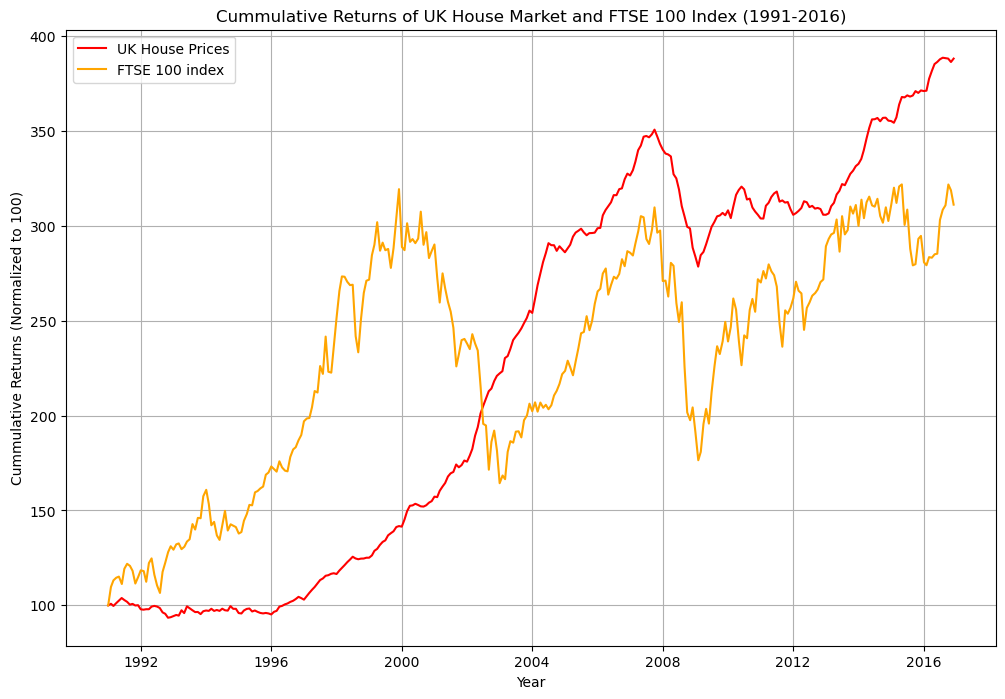

Date
2016-11-01    6917.14
2016-12-01    6752.93
Name: Adj Close, dtype: float64
6752.93
6917.14
Annualized Return (as a percentage):4.7457163976205585%


In [89]:
# to utilize the read_excel function
import pandas as pd
# to utilize the arange function
import numpy as np
# to configure and plot graphs
import matplotlib.pyplot as plt

# save data from file into dataframe
house_df = pd.read_excel('data/Monthly Average House Price.xls', sheet_name='Monthly')
house_df['Date'] = pd.to_datetime(house_df['Unnamed: 0'])
house_df.set_index('Unnamed: 0', inplace=True)

house_df  = house_df[house_df.index <= '2016-12-31']

ftse_df = pd.read_csv('data/FTSE100.csv')
ftse_df['Date'] = pd.to_datetime(ftse_df['Date'])
ftse_df.set_index('Date', inplace=True)

ftse_df = ftse_df[ftse_df.index <= '2016-12-31']

# house_df.sort_index(inplace=True)
# ftse_df.sort_index(inplace=True)
ftse_df.sort_index(inplace=True)

house_df['Normalized'] = (house_df['Average House Price']/house_df['Average House Price'].iloc[0])* 100
ftse_df['Normalized'] = (ftse_df['Adj Close'] / ftse_df['Adj Close'].iloc[0]) * 100


# configure and plot graph
plt.figure(figsize=(12,8))
plt.plot(house_df.index, house_df['Normalized'], label='UK House Prices', color='red')
# plt.plot(house_cum_normalized.index, house_cum_normalized, label='UK House Prices', color='red')
plt.plot(ftse_df.index, ftse_df['Normalized'], label='FTSE 100 index', color='orange')
# plt.plot(ftse_cum_normalized.index, ftse_cum_normalized, label='FTSE 100 index', color='orange')
plt.title("Cummulative Returns of UK House Market and FTSE 100 Index (1991-2016)")
plt.xlabel("Year")
plt.ylabel("Cummulative Returns (Normalized to 100)")
plt.grid()
plt.legend()
plt.show()

# finding the annualized return for the period 1991-2016
start_value = ftse_df['Adj Close'].values[0]
end_value = ftse_df['Adj Close'].values[-2]
total_return = (end_value- start_value)/start_value
years = 2016-1991

annualized_return = 100 * ((1 + total_return)**(1/years)-1)

print(f"Annualized Return (as a percentage):{annualized_return}%" )
